In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

plt.style.use('seaborn-poster')

## solution to problem 5

In [41]:
x = np.linspace(0, 2*np.pi, 1000)
y = 3*np.sin(x) - 2*np.cos(x) + np.random.random(len(x))
f = [np.sin, np.cos]

In [48]:
def my_lin_regression(f, x, y):
    A = []
    for func in f:
        A.append(func(x))

    A.append(np.ones(len(x)))

    A = np.vstack(A).T

    beta = np.linalg.lstsq(A, y, rcond=None)[0]
    return beta

In [56]:
beta = my_lin_regression(f, x, y)
beta

array([ 2.99962799, -2.02061842,  0.48912238])

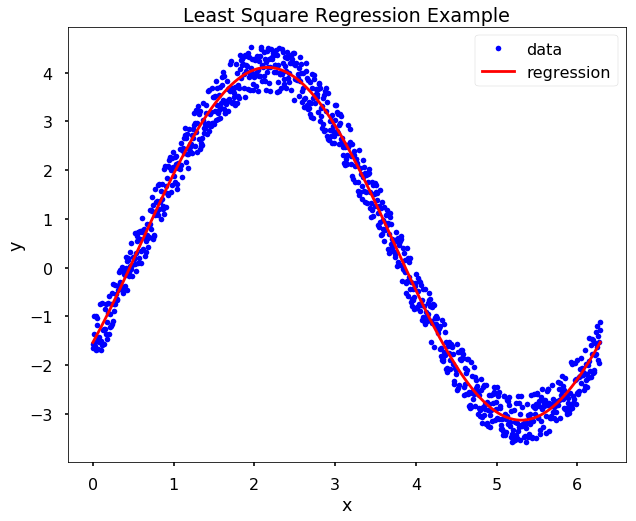

In [57]:
plt.figure(figsize = (10,8))
plt.plot(x,y,'b.', label = 'data')
plt.plot(x, beta[0]*f[0](x)+beta[1]*f[1](x)+beta[2], 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression Example')
plt.legend()
plt.savefig('16.06.01-problem_5_example.jpg', dpi=300,bbox_inches='tight')

## Solution to problem 6

In [61]:
def my_exp_regression(x, y):
    def func(x, a, b):
        y = a*np.exp(b*x)
        return y
    
    alpha, beta = optimize.curve_fit(func, x, y)[0]
    return alpha, beta

In [63]:
x = np.linspace(0, 1, 1000)
y = 2*np.exp(-0.5*x) + 0.25*np.random.random(len(x))

alpha, beta = my_exp_regression(x, y)
print(f'alpha = {alpha}, beta ={beta}')

alpha = 2.1168346632045294, beta =-0.4572768974507084


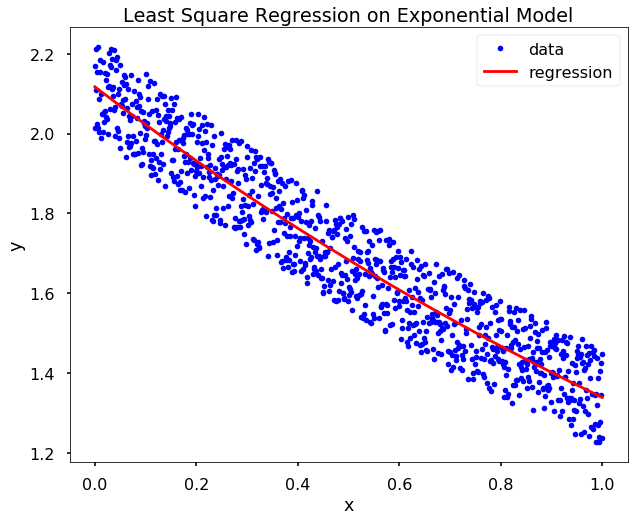

In [64]:
plt.figure(figsize = (10,8))
plt.plot(x,y,'b.', label = 'data')
plt.plot(x, alpha*np.exp(beta*x), 'r', label='regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Least Square Regression on Exponential Model')
plt.legend()
plt.savefig('16.06.02-problem_6_example.jpg', dpi=300,bbox_inches='tight')